# **Heart Failure Machine Learning**

## **Set up and Loading Data**

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = '/content/drive/My Drive/PROJECT/heart_failure_clinical_records_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
# Display statistical summary of the data
print("\nStatistical summary:")
df.describe()


Statistical summary:


age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

### Dataset Overview

- **age**: Ranges from 40 to 95 years with an average of around 61 years.
- **anaemia**, **diabetes**, **high_blood_pressure**, **sex**, **smoking**, **DEATH_EVENT**: Boolean variables (0 or 1) - the presence of a condition or attribute.
- **creatinine_phosphokinase**: Enzyme levels vary widely, up to 7861 mcg/L.
- **ejection_fraction**: Percentage of blood leaving the heart each contraction, averaging around 38%.
- **platelets**, **serum_creatinine**, **serum_sodium**: Blood composition ranges.
- **time**: Follow-up period in days, up to 285.



In [4]:
#information about the dataframe including the data types and non-null counts
print("\nDataframe information:")
df.info()


Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30

# **EDA**

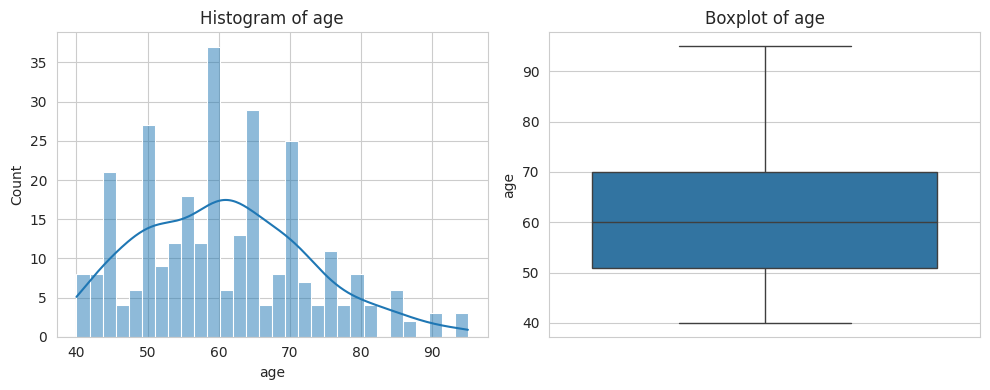

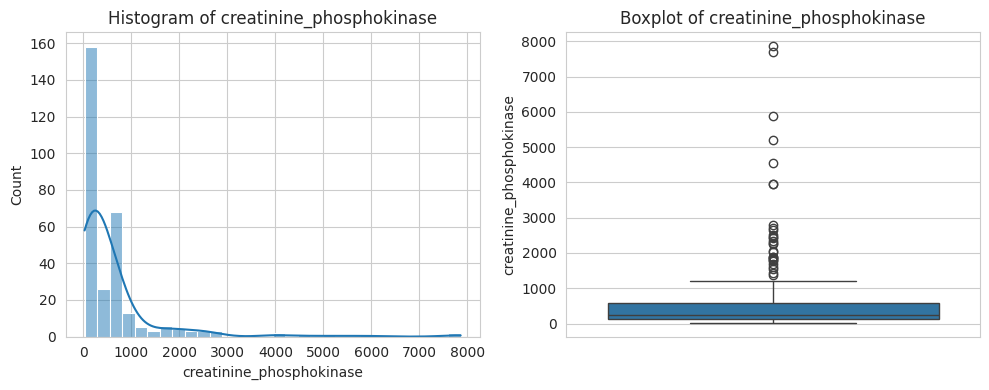

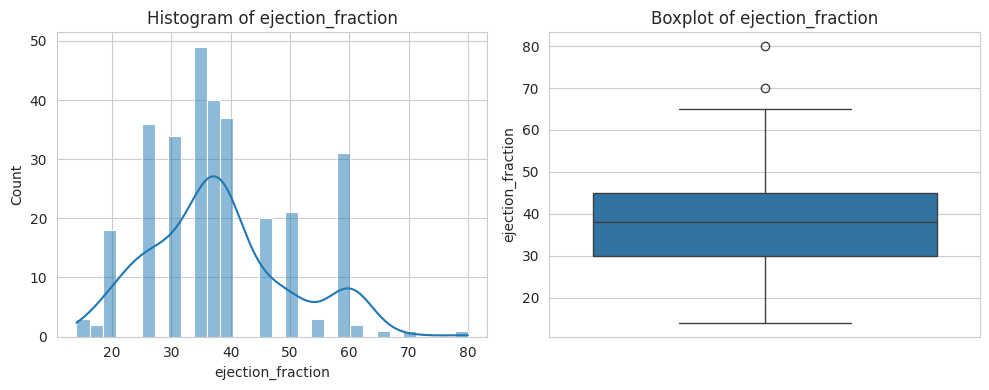

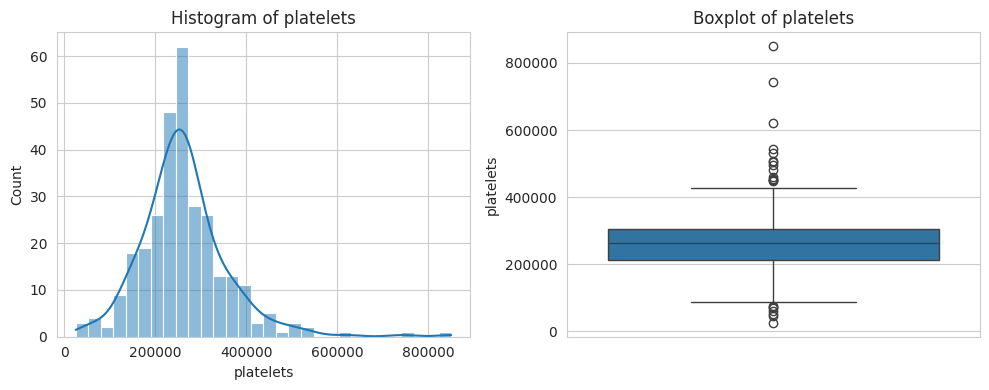

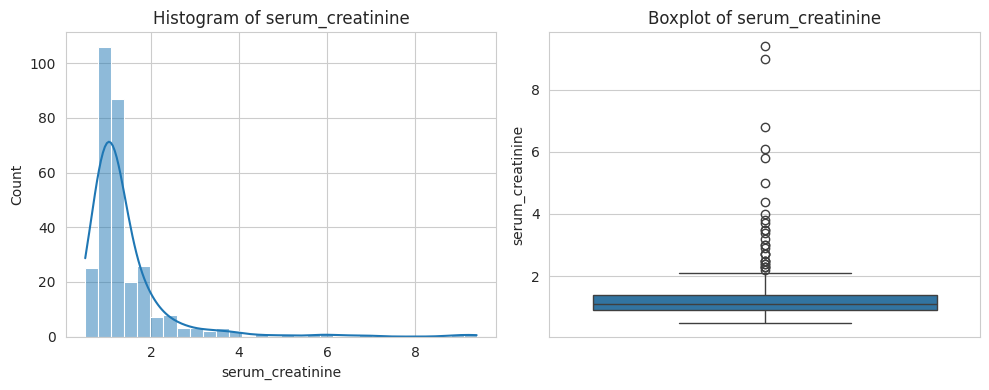

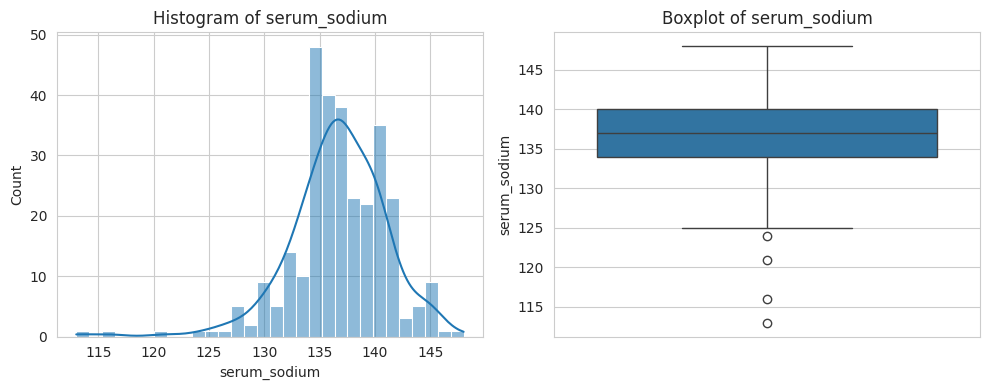

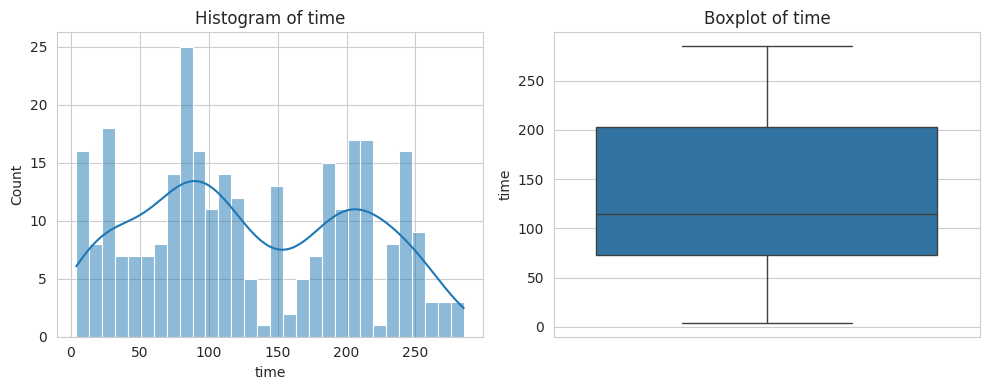

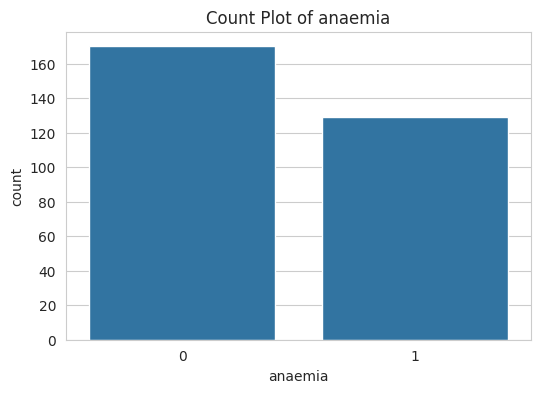

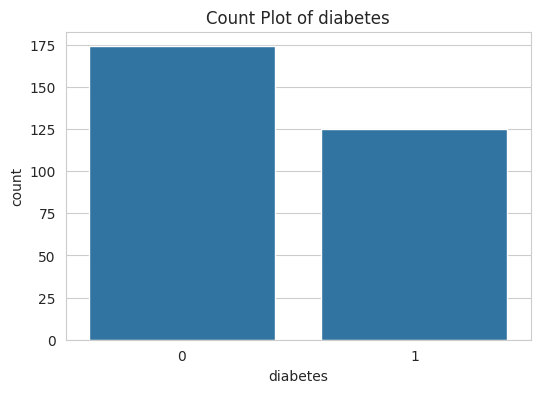

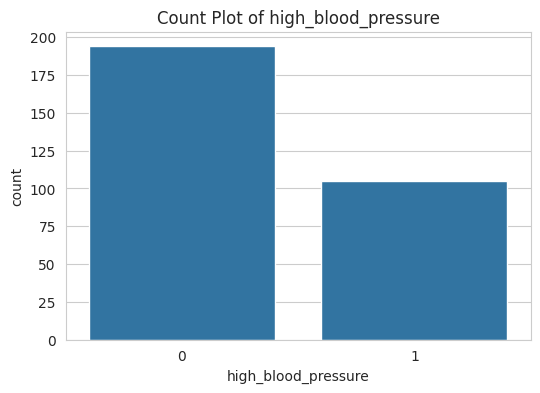

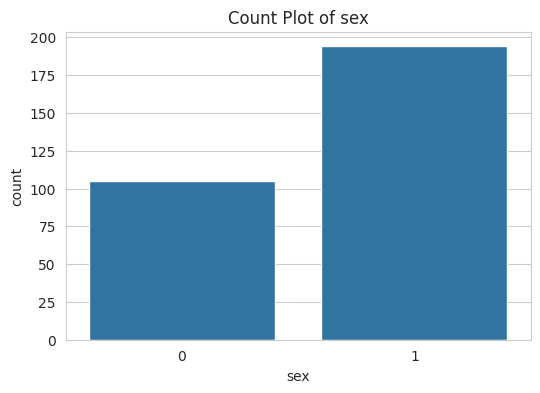

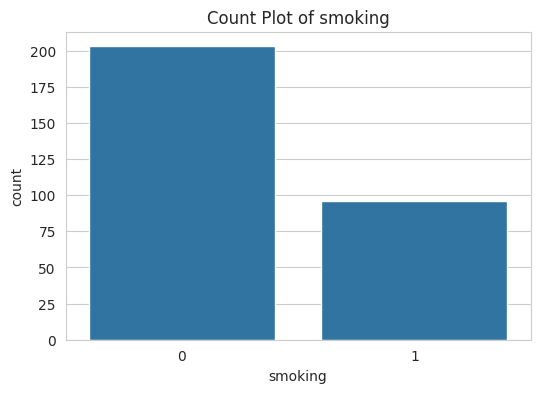

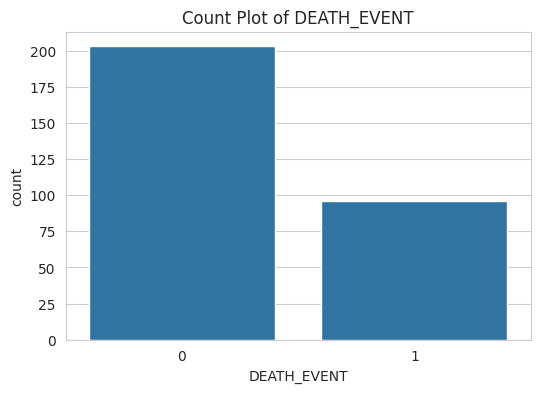

In [5]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Identify continuous and categorical variables
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

#  distributions - continuous variables
for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Histogram of {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()
    plt.show()

#  distributions of categorical variables
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[var])
    plt.title(f'Count Plot of {var}')
    plt.show()

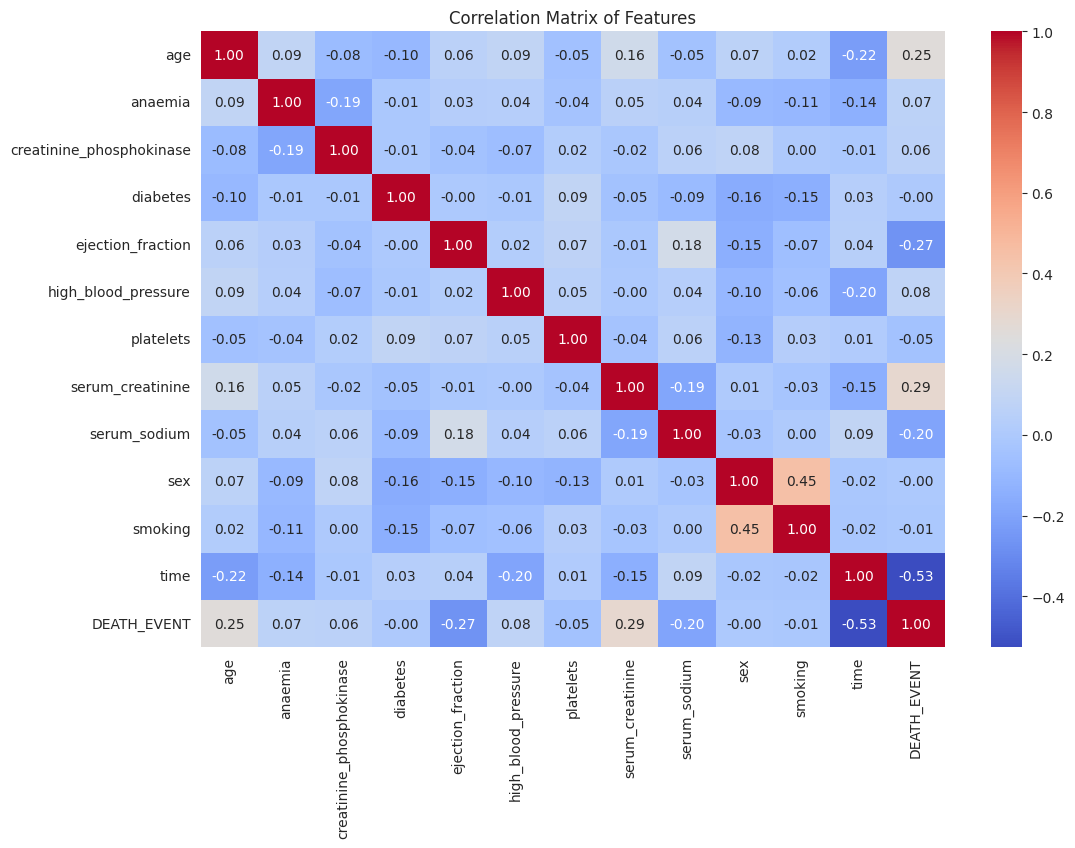

In [6]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot  heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

### Distribution of Patient Ages and Creatinine Phosphokinase Levels

-  most patients are in their 50s and 60s, and creatinine phosphokinase levels are skewed right.
- The boxplots show a fairly even age distribution, while creatinine phosphokinase levels are mostly concentrated in the lower range with a few extreme values.

### Distribution of Ejection Fraction and Platelets

- Ejection fraction levels are mostly clustered around 40%, with a few outliers shown in the boxplot.
- The distribution of platelets in the blood is skewed right, most patients have platelet counts in a lower range with some high count.

### Distribution of Serum Creatinine and Serum Sodium

- Serum creatinine levels are predominantly low with a right skew, a few patients have higher levels.
- Serum sodium levels show a normal distribution centered around 137 mEq/L, with the boxplot revealing some below the normal range.

### Time of Follow-up and Boolean Features

- The follow-up time histogram shows a wide distribution, with several peaks, different periods when patients had their follow-up.
- Count plots for anaemia, diabetes, high blood pressure, sex, smoking, and DEATH_EVENT show proportions of patients with each condition, where `0` denotes absence and `1` indicates presence.
- For example, there are more patients without anaemia than with it, and more patients who are non-smokers than smokers.

### Correlation Matrix

- The heatmap indicates how each feature correlates with others. For instance, `time` and `DEATH_EVENT` show a significant negative correlation, longer follow-up times are associated with lower mortality in the dataset.


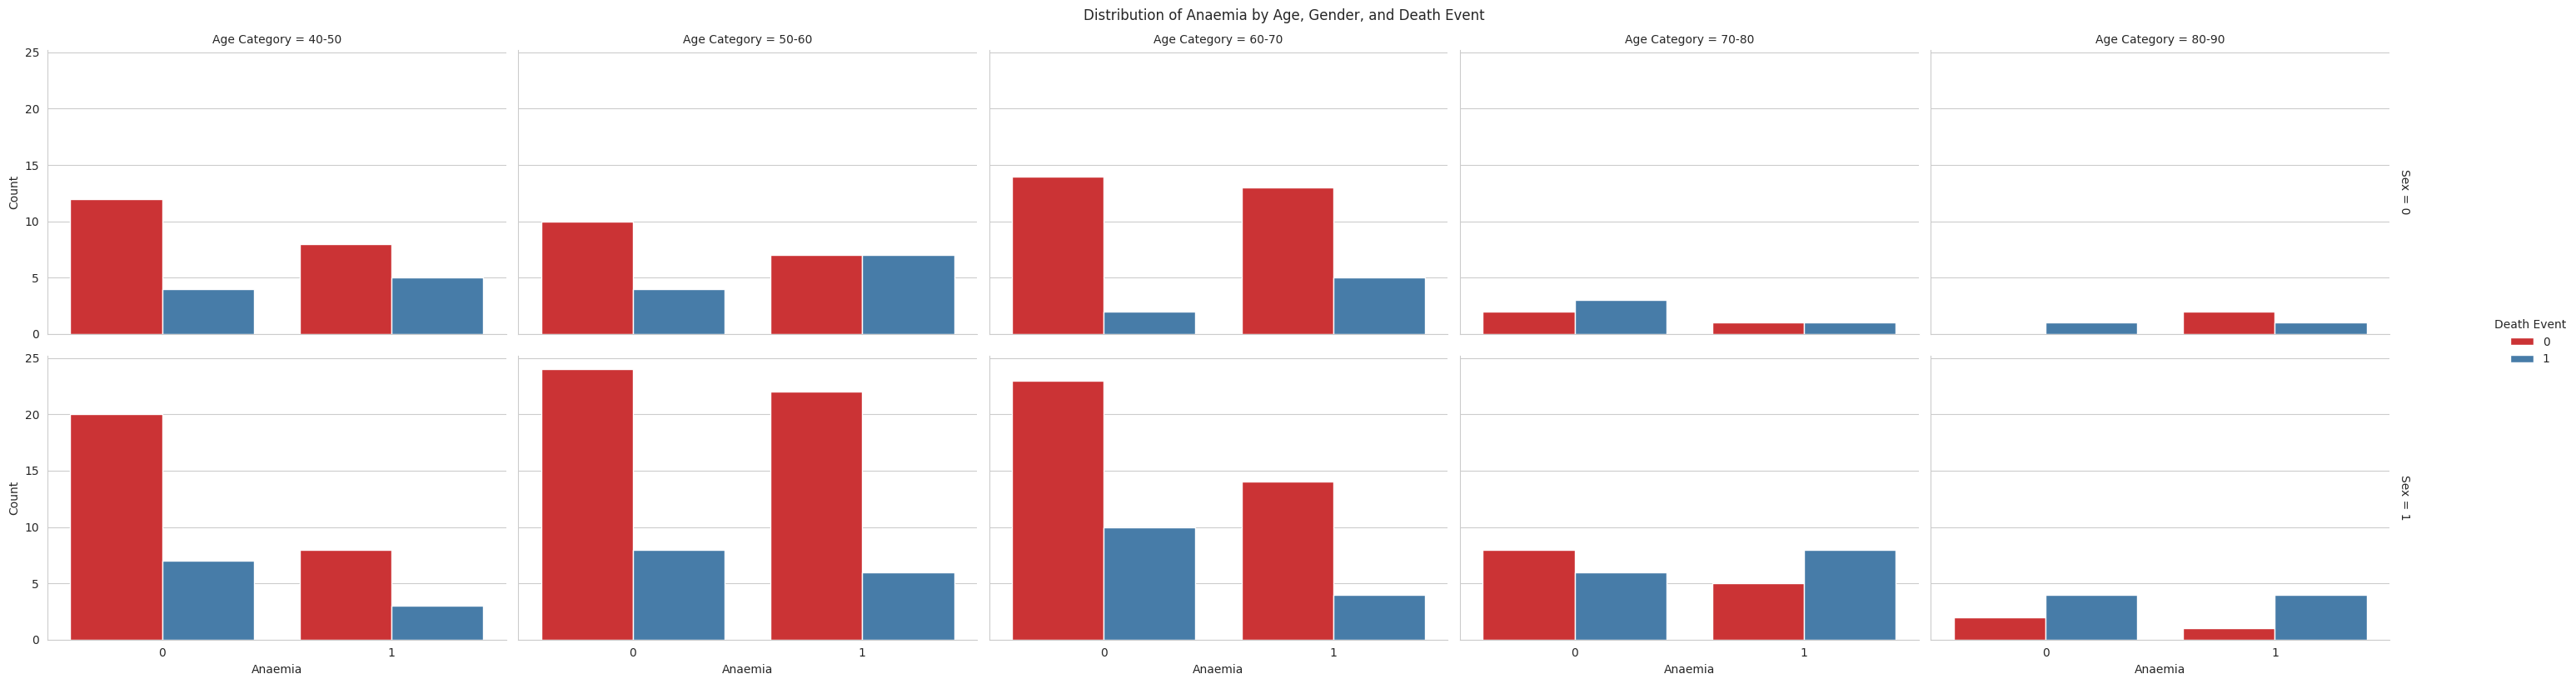

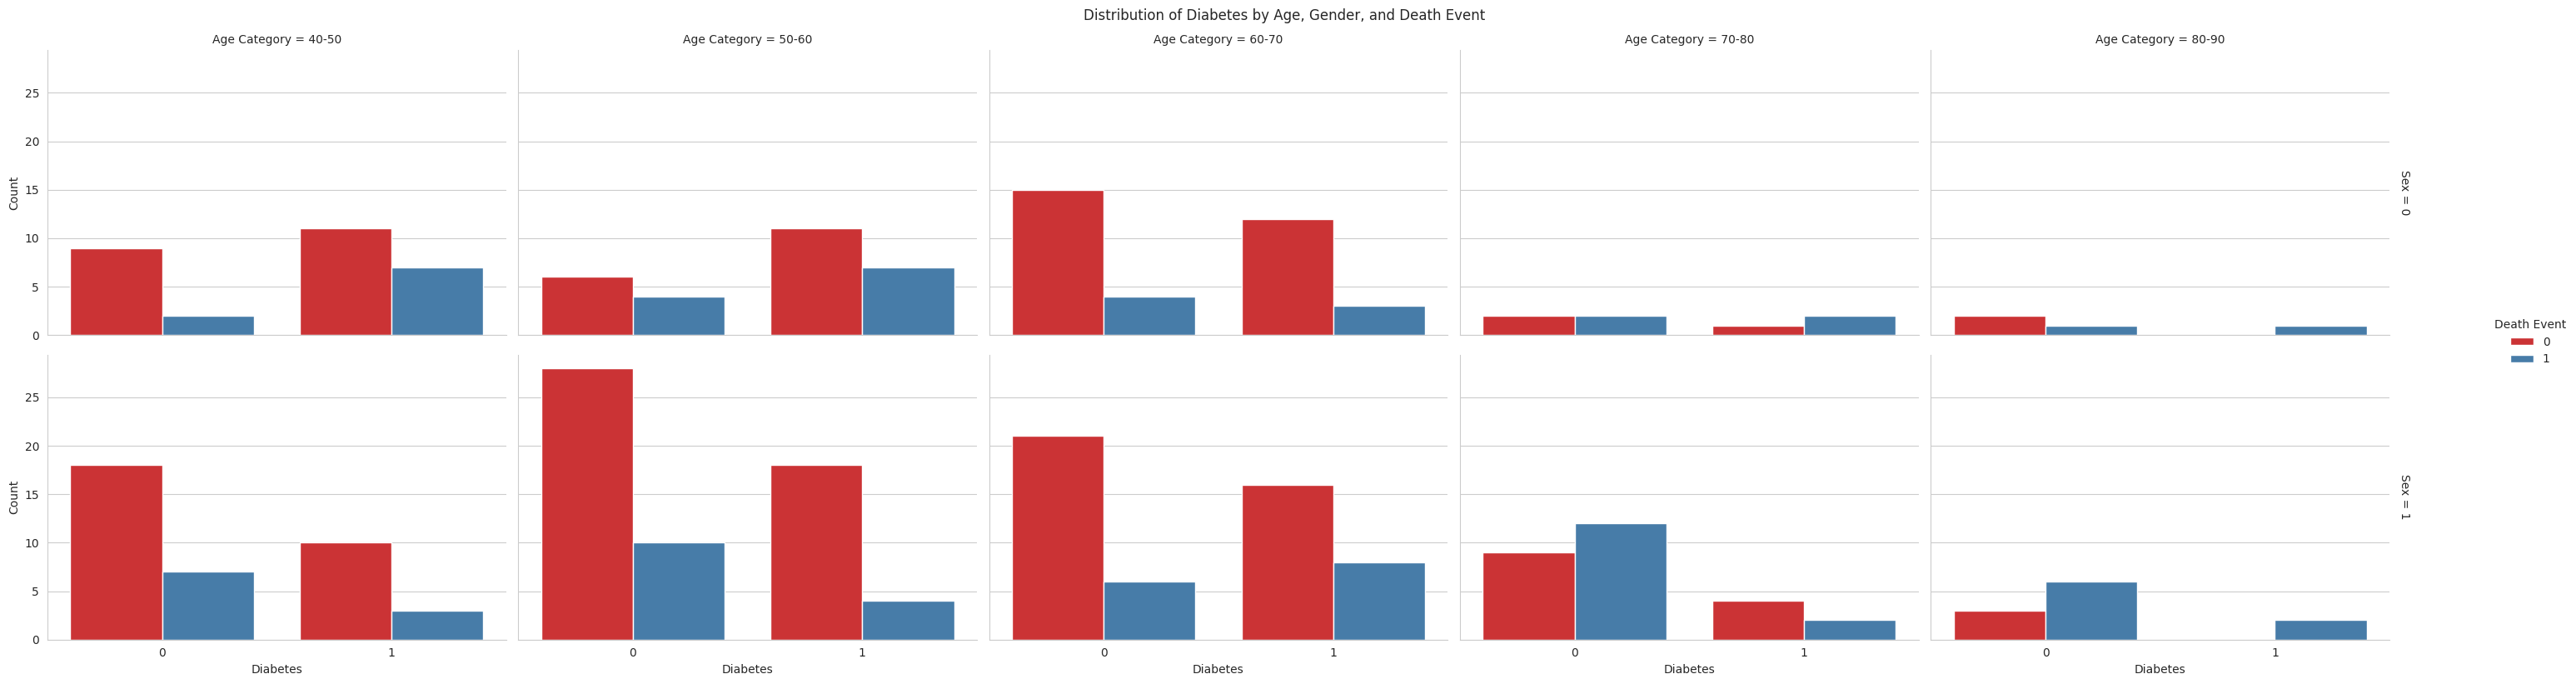

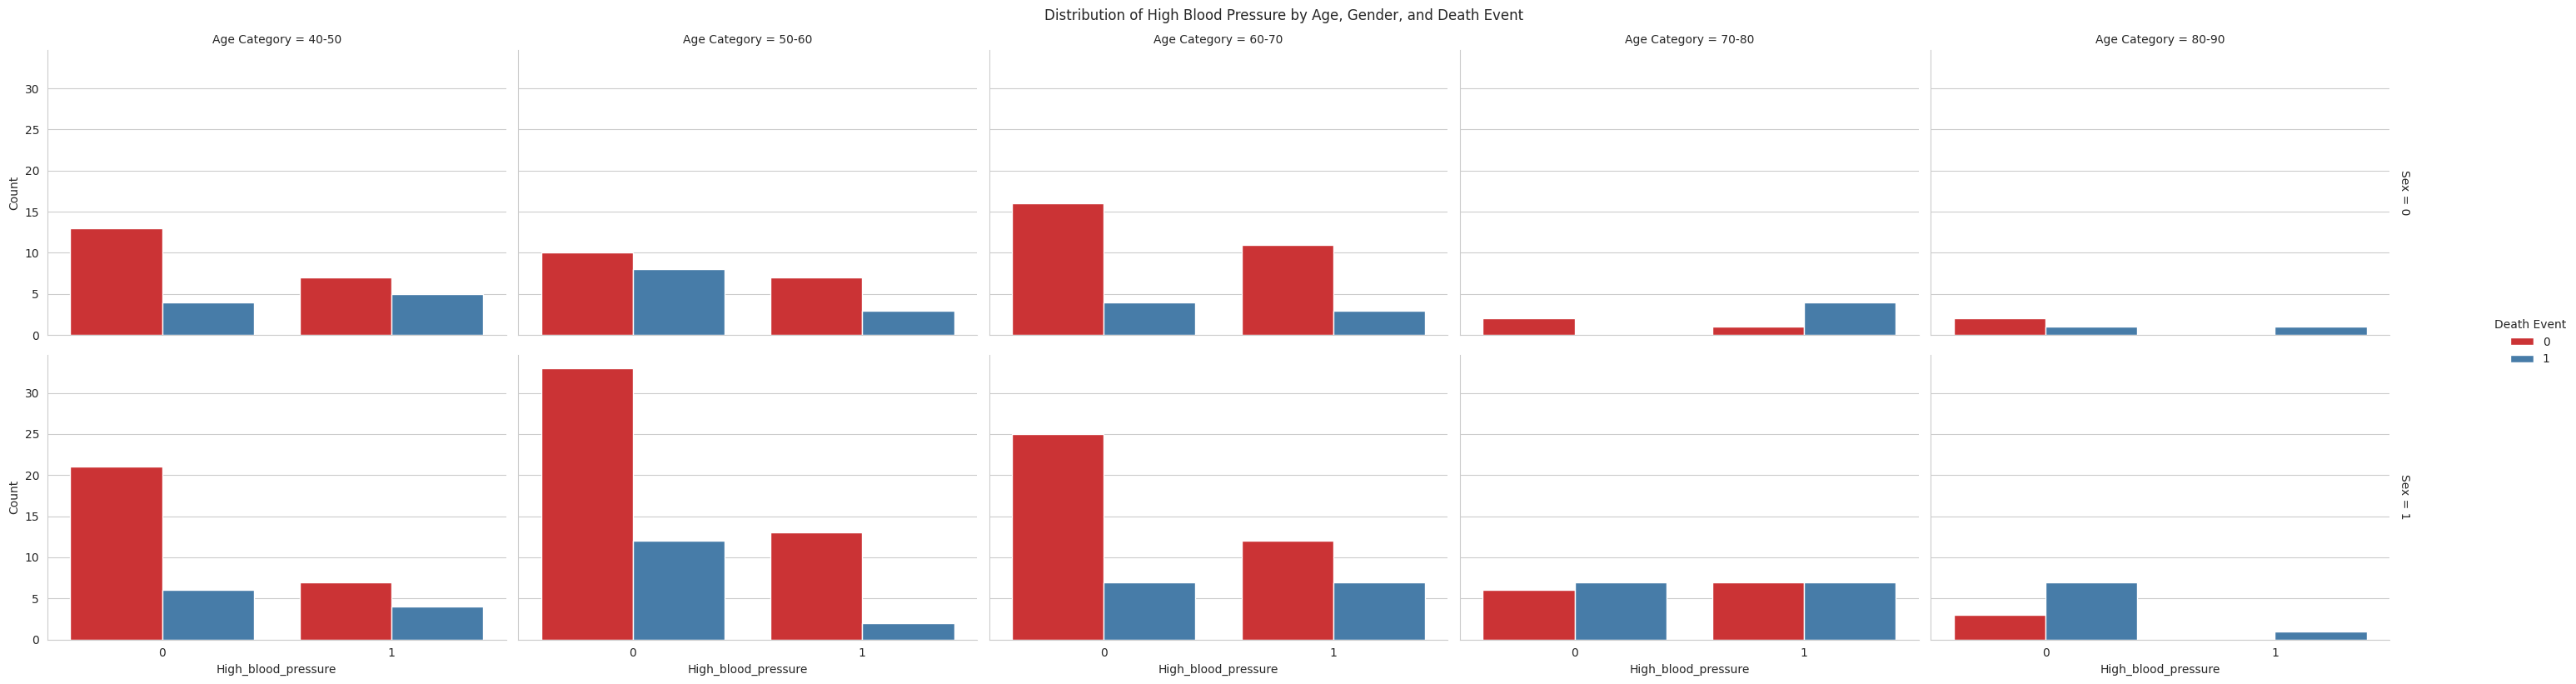

In [28]:
# Convert age to categorical age groups, if not already done
df['age_category'] = pd.cut(df['age'], bins=[40, 50, 60, 70, 80, 90], labels=['40-50', '50-60', '60-70', '70-80', '80-90'])

# Define a function to create the plots for a given condition
def plot_condition_by_age_sex(condition_column, title):
    # Initialize the FacetGrid object for visualizing the condition by age and sex, with Death Event as hue
    g = sns.FacetGrid(df, col='age_category', row='sex', margin_titles=True, height=4, aspect=1.5)

    # Map the countplot to the grid
    g.map_dataframe(sns.countplot, x=condition_column, hue='DEATH_EVENT', palette='Set1')

    # Adjust titles and labels
    g.add_legend(title="Death Event")
    g.set_axis_labels(condition_column.capitalize(), "Count")
    g.set_titles(row_template='Sex = {row_name}', col_template='Age Category = {col_name}')
    g.fig.suptitle(f'{title}', y=1.02)

    # Show plot
    plt.show()

# Plot for Anaemia
plot_condition_by_age_sex('anaemia', 'Distribution of Anaemia by Age, Gender, and Death Event')

# Plot for Diabetes
plot_condition_by_age_sex('diabetes', 'Distribution of Diabetes by Age, Gender, and Death Event')

# Plot for High Blood Pressure
plot_condition_by_age_sex('high_blood_pressure', 'Distribution of High Blood Pressure by Age, Gender, and Death Event')

### Visual Analysis of Health Conditions by Age, Gender, and Mortality Outcome

#### 1. Distribution of Anaemia, Diabetes, and High Blood Pressure Across Age Groups and Gender
- The **facet grid plots** show the distribution of conditions such as anaemia, diabetes, and high blood pressure among different age categories (40-90) and across genders.
- Each condition is further analyzed by the **presence or absence of the DEATH_EVENT**, represented as 0 (no death) and 1 (death).
- **Observations**:
  - Across all age groups, mortality rates (DEATH_EVENT = 1) tend to be higher among individuals with these health conditions, especially in the higher age brackets.
  - **Anaemia**: Mortality is slightly higher in patients with anaemia in the 50-70 age range, with an even distribution across genders.
  - **Diabetes**: Patients with diabetes show a noticeable mortality rate across age groups, particularly in the age categories of 50-60 and 60-70, with minor gender differences.
  - **High Blood Pressure**: Mortality rates for high blood pressure are significant in younger age groups (40-60), with mortality gradually decreasing as the age category increases.

#### 2. Gender Differences in Mortality
- **Gender-Specific Trends**:
  - Males (sex = 1) generally show higher counts in mortality outcomes, especially in the presence of these health conditions, when compared to females (sex = 0).
  - The differences are particularly noticeable in patients with **high blood pressure** and **diabetes**, suggesting that these conditions may contribute more significantly to mortality in males within this dataset.

#### 3. Age Group Observations
- **Age-Specific Trends**:
  - Higher mortality is observed in the **50-70 age range** across all conditions.
  - In the **older age categories** (70-90), the count of patients decreases, but the mortality rate remains significant among those with high blood pressure and anaemia.
  - The 40-50 age group has the lowest mortality rate overall, indicating that these conditions are less likely to lead to death in younger patients within this sample.

#### Conclusion
- The visualizations highlight the strong correlation between the presence of certain conditions (anaemia, diabetes, high blood pressure) and mortality, especially among males and in middle-aged to older adults.


# Survival Analysis Plot

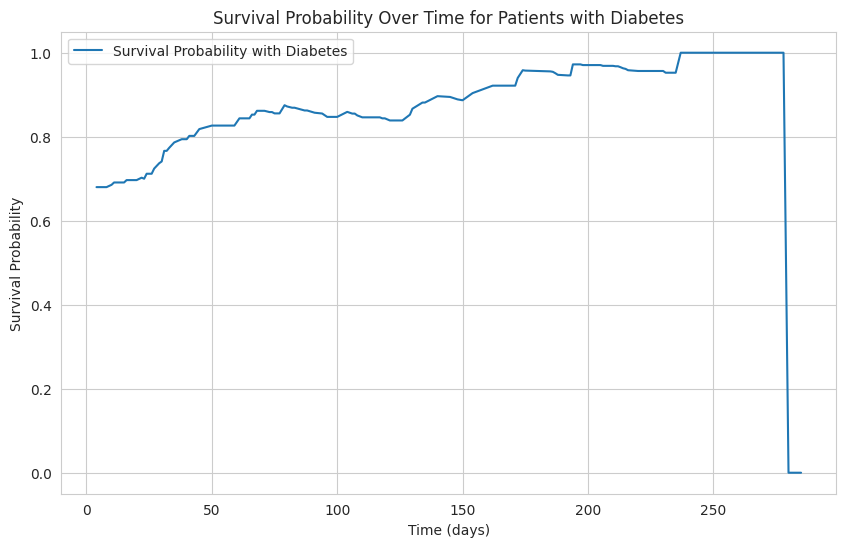

In [32]:
# Define a function to calculate survival probability over time without reindexing warnings
def plot_survival_probability(df, condition_column):
    time_points = sorted(df['time'].unique())
    survival_prob = []

    for t in time_points:
        # Filter for the time condition first, then apply the condition column filter
        subset = df[df['time'] >= t]
        subset_condition = subset[subset[condition_column] == 1]

        # Calculate the alive and total counts based on the subset
        alive_count = subset_condition['DEATH_EVENT'].value_counts().get(0, 0)
        total_count = len(subset_condition)

        # Append the survival probability, handling cases where total_count is 0
        survival_prob.append(alive_count / total_count if total_count > 0 else 0)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, survival_prob, label=f'Survival Probability with {condition_column.capitalize()}')
    plt.xlabel('Time (days)')
    plt.ylabel('Survival Probability')
    plt.title(f'Survival Probability Over Time for Patients with {condition_column.capitalize()}')
    plt.legend()
    plt.show()

# Plot for diabetes
plot_survival_probability(df, 'diabetes')

### Survival Probability Over Time for Patients with Diabetes

The line plot above illustrates the **survival probability** over time for patients with diabetes in the dataset.

- **X-axis (Time in Days)**: Represents the duration of follow-up for each patient in days, ranging up to nearly 285 days.
- **Y-axis (Survival Probability)**: Shows the probability of survival, which ranges from 0 (no survival) to 1 (100% survival).

#### Key Observations:
1. **Initial Increase**: The survival probability initially increases as time progresses. This is likely due to the elimination of cases with early death events, leaving only patients with longer survival times in the calculation.
2. **Plateau**: Between 100 to 200 days, the survival probability remains relatively steady, indicating that patients in this period have a stable survival rate.
3. **Sudden Drop**: Toward the end of the observation period (around 285 days), there is a sudden drop in survival probability. This could be attributed to a smaller number of patients remaining in the study at this stage, making the survival probability calculation more sensitive to individual events.

#### Conclusion:
This plot highlights that while survival probability for diabetic patients initially increases and stabilizes, it drops sharply toward the end of the observation period, possibly due to fewer patients remaining in the dataset at longer follow-up durations. This analysis provides insights into the mortality trend of diabetic patients over time and could guide further investigation into the factors influencing survival rates in this group.

# Box Plot for Biomarker Levels by Death Event Status

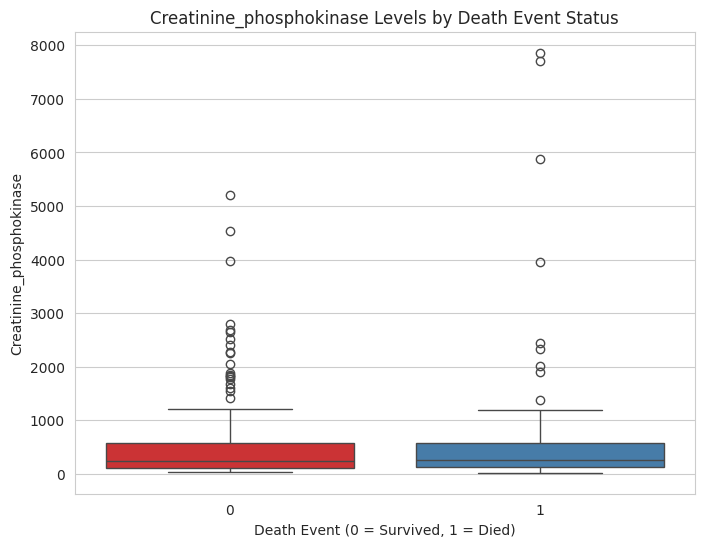

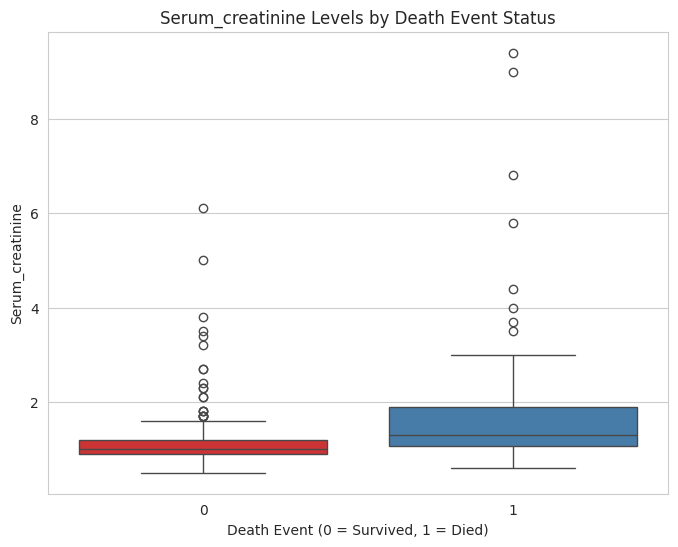

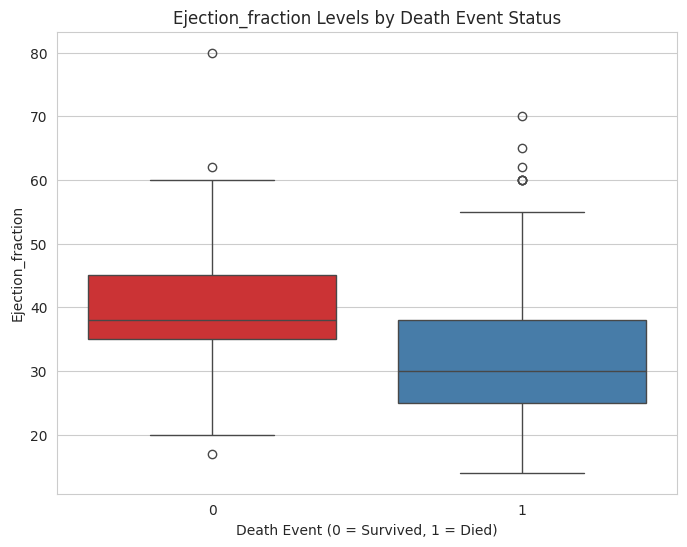

In [31]:
# Biomarkers to analyze
biomarkers = ['creatinine_phosphokinase', 'serum_creatinine', 'ejection_fraction']

# Plot box plots for each biomarker
for biomarker in biomarkers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='DEATH_EVENT', y=biomarker, data=df, palette='Set1')
    plt.title(f'{biomarker.capitalize()} Levels by Death Event Status')
    plt.xlabel('Death Event (0 = Survived, 1 = Died)')
    plt.ylabel(biomarker.capitalize())
    plt.show()

# Machine Learning Modeling


**Preprocessing Data**

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

#  a transformer to apply log transformation
def log_transform(x):
    return np.log(x + 1)

columns_to_transform = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']
preprocessor = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(log_transform), columns_to_transform)
    ],
    remainder='passthrough'
)

#  features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features within  pipeline
numeric_features = ['age', 'ejection_fraction', 'serum_sodium', 'time']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing for numeric and log transform features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('log', FunctionTransformer(log_transform), columns_to_transform)
    ])

#  machine learning pipeline including the preprocessor and an estimator
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression())])

dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier())])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier())])

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])

# Fit  pipelines
lr_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:13:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'ejection_fraction',
                                                   'serum_sodium', 'time']),
                                                 ('log',
                                                  FunctionTransformer(func=<function log_transform at 0x7bc274d05480>),
                                                  ['creatinine_phosphokinase',
                                                   'platelets',
                                                   'serum_creatinine'])])),
                ('classifier',
                 XGBClassifier(base_score=None, b...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Logistic Regression Test Accuracy: 0.77
Logistic Regression Test Precision: 0.92
Logistic Regression Test Recall: 0.48
Logistic Regression Test F1-Score: 0.63


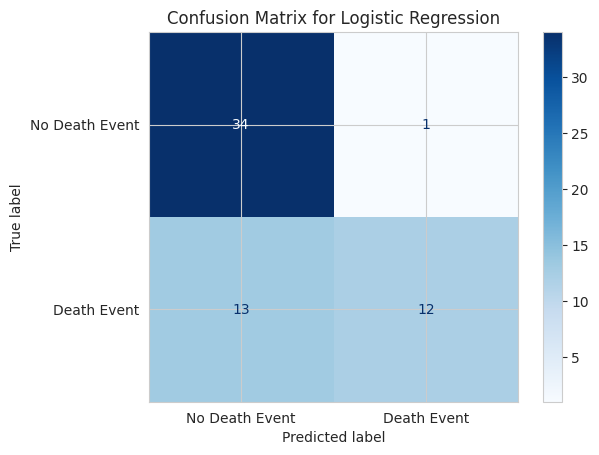

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression

# Predictions and Evaluation Metrics
lr_test_pred = lr_pipeline.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, lr_test_pred)
lr_test_precision = precision_score(y_test, lr_test_pred)
lr_test_recall = recall_score(y_test, lr_test_pred)
lr_test_f1 = f1_score(y_test, lr_test_pred)

# Print Evaluation Metrics
print(f"Logistic Regression Test Accuracy: {lr_test_accuracy:.2f}")
print(f"Logistic Regression Test Precision: {lr_test_precision:.2f}")
print(f"Logistic Regression Test Recall: {lr_test_recall:.2f}")
print(f"Logistic Regression Test F1-Score: {lr_test_f1:.2f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, lr_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Death Event", "Death Event"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

Decision Tree Test Accuracy: 0.65
Decision Tree Test Precision: 0.60
Decision Tree Test Recall: 0.48
Decision Tree Test F1-Score: 0.53


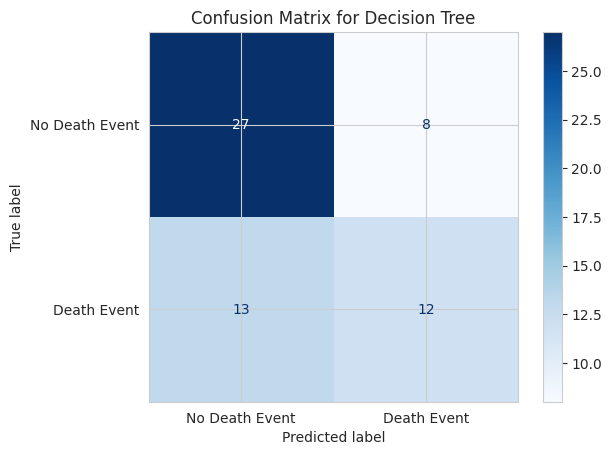

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Decision Tree Pipeline

# Predictions and Evaluation Metrics
dt_test_pred = dt_pipeline.predict(X_test)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)
dt_test_precision = precision_score(y_test, dt_test_pred)
dt_test_recall = recall_score(y_test, dt_test_pred)
dt_test_f1 = f1_score(y_test, dt_test_pred)

# Print Evaluation Metrics
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.2f}")
print(f"Decision Tree Test Precision: {dt_test_precision:.2f}")
print(f"Decision Tree Test Recall: {dt_test_recall:.2f}")
print(f"Decision Tree Test F1-Score: {dt_test_f1:.2f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, dt_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Death Event", "Death Event"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

Random Forest Test Accuracy: 0.72
Random Forest Test Precision: 0.75
Random Forest Test Recall: 0.48
Random Forest Test F1-Score: 0.59


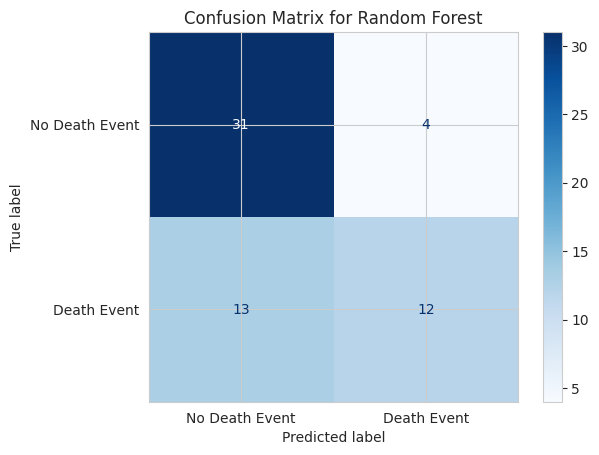

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Random Forest Pipeline

# Predictions and Evaluation Metrics
rf_test_pred = rf_pipeline.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_test_precision = precision_score(y_test, rf_test_pred)
rf_test_recall = recall_score(y_test, rf_test_pred)
rf_test_f1 = f1_score(y_test, rf_test_pred)

# Print Evaluation Metrics
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")
print(f"Random Forest Test Precision: {rf_test_precision:.2f}")
print(f"Random Forest Test Recall: {rf_test_recall:.2f}")
print(f"Random Forest Test F1-Score: {rf_test_f1:.2f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, rf_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Death Event", "Death Event"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.show()

XGBoost Test Accuracy: 0.75
XGBoost Test Precision: 0.75
XGBoost Test Recall: 0.60
XGBoost Test F1-Score: 0.67


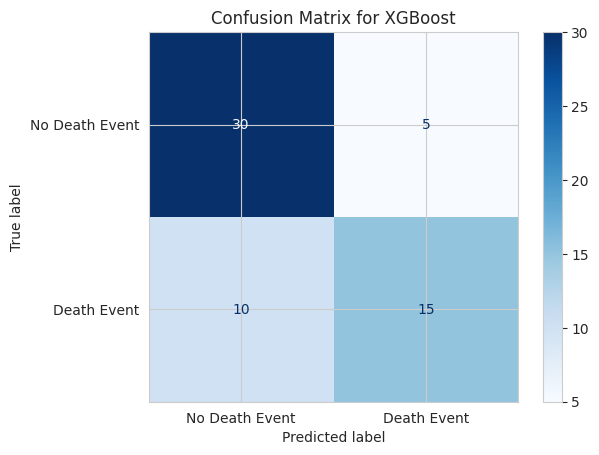

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# XGBoost Pipeline

# Predictions and Evaluation Metrics
xgb_test_pred = xgb_pipeline.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_pred)
xgb_test_precision = precision_score(y_test, xgb_test_pred)
xgb_test_recall = recall_score(y_test, xgb_test_pred)
xgb_test_f1 = f1_score(y_test, xgb_test_pred)

# Print Evaluation Metrics
print(f"XGBoost Test Accuracy: {xgb_test_accuracy:.2f}")
print(f"XGBoost Test Precision: {xgb_test_precision:.2f}")
print(f"XGBoost Test Recall: {xgb_test_recall:.2f}")
print(f"XGBoost Test F1-Score: {xgb_test_f1:.2f}")

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, xgb_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Death Event", "Death Event"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for XGBoost")
plt.show()

### Model Performance Summary

This section summarizes the performance of four machine learning models—**Logistic Regression**, **Decision Tree**, **Random Forest**, and **XGBoost**—in predicting patient survival (Death Event) based on various health indicators.

#### 1. Logistic Regression
- **Accuracy**: 0.77
- **Precision**: 0.92
- **Recall**: 0.48
- **F1-Score**: 0.63
- **Confusion Matrix**: Logistic Regression performed well in identifying "No Death Event" cases but struggled with "Death Event" cases. High precision indicates that when it predicted "Death Event," it was often correct. However, the low recall shows it missed a significant number of actual "Death Event" cases.

#### 2. Decision Tree
- **Accuracy**: 0.65
- **Precision**: 0.60
- **Recall**: 0.48
- **F1-Score**: 0.53
- **Confusion Matrix**: The Decision Tree model showed moderate performance but was less accurate than Logistic Regression. It had balanced precision and recall values, though both were lower, indicating that the model was less precise and missed many true "Death Event" cases.

#### 3. Random Forest
- **Accuracy**: 0.72
- **Precision**: 0.75
- **Recall**: 0.48
- **F1-Score**: 0.59
- **Confusion Matrix**: The Random Forest model improved over the Decision Tree with a higher accuracy and precision, suggesting fewer false positives. However, the recall was still low, indicating that while it could correctly predict "No Death Event," it struggled to identify all "Death Event" cases accurately.

#### 4. XGBoost
- **Accuracy**: 0.75
- **Precision**: 0.75
- **Recall**: 0.60
- **F1-Score**: 0.67
- **Confusion Matrix**: XGBoost achieved the best balance between precision and recall, with the highest recall (0.60) among all models. This indicates that XGBoost is better at identifying "Death Event" cases, reducing the number of missed true positives, which is crucial for this problem.

#### Conclusion
- **Best Model**: **XGBoost** demonstrated the best overall performance with the highest recall and F1-Score, making it the most balanced model for this dataset.
- **Trade-offs**: Logistic Regression achieved the highest precision but at the expense of recall. Decision Tree and Random Forest had moderate performance but did not excel in either recall or precision.

Based on these results, **XGBoost** is the recommended model for its ability to better identify "Death Event" cases, which could be vital in medical applications where identifying high-risk patients is essential.


## **Hyperparameter Tuning**

In [37]:
# Parameter grid for Logistic Regression
lr_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2']
}

# Perform Grid Search with accuracy as the scoring metric
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='accuracy', verbose=1)
lr_grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l2'}


In [38]:
# Parameter grid for Decision Tree
dt_param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform Grid Search with accuracy as the scoring metric
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy', verbose=1)
dt_grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters for Decision Tree: {dt_grid_search.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2}


In [39]:
# Parameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform Grid Search with accuracy as the scoring metric
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [41]:
import warnings
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")

# Update XGBoost pipeline without `use_label_encoder`
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss'))  # Remove `use_label_encoder`
])

# Parameter grid for XGBoost
xgb_param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__max_depth': [3, 4, 5, 6],
    'classifier__n_estimators': [100, 200, 300]
}

# Perform Grid Search
xgb_grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='accuracy', verbose=1)
xgb_grid_search.fit(X_train, y_train)

# Display best parameters
print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}


### Hyperparameter Tuning Results

The following summarizes the optimal parameters obtained for each model through hyperparameter tuning, aimed at improving model performance and generalizability:

- **Logistic Regression**
  - **Best Parameters**:
    - Regularization Strength (`C`): 1
    - Penalty Type: `l2`
  - **Summary**:  
    The selected parameters provide a moderate regularization to prevent overfitting while maintaining interpretability.

- **Decision Tree**
  - **Best Parameters**:
    - Maximum Depth (`max_depth`): 10
    - Minimum Samples for Split (`min_samples_split`): 2
  - **Summary**:  
    Limiting the tree depth to 10 enhances generalization, while allowing finer splits with `min_samples_split` set to 2 ensures detailed tree structure where necessary.

- **Random Forest**
  - **Best Parameters**:
    - Maximum Depth (`max_depth`): None (unlimited)
    - Maximum Features (`max_features`): `log2`
    - Minimum Samples for Split (`min_samples_split`): 5
    - Number of Estimators (`n_estimators`): 100
  - **Summary**:  
    The Random Forest benefits from the use of `log2` for `max_features` to balance variance and bias, while 100 estimators provide reliable predictions without excessive computation.

- **XGBoost**
  - **Best Parameters**:
    - Learning Rate (`learning_rate`): 0.1
    - Maximum Depth (`max_depth`): 3
    - Number of Estimators (`n_estimators`): 100
  - **Summary**:  
    With a moderate learning rate and a maximum depth of 3, the XGBoost model avoids overfitting and maintains good generalization, making it a reliable choice for prediction.

These tuned parameters are designed to improve model accuracy and robustness for our dataset, enhancing their predictive performance.

## Model Prediction Interpretation/Explanation

##  **Using Eli**

In [20]:
!pip install scikit-learn==1.1.3
!pip install eli5==0.13.0

In [50]:
import eli5
from eli5.sklearn import PermutationImportance

# Apply permutation importance on the transformed data
perm = PermutationImportance(lr_pipeline.named_steps['classifier'], random_state=42).fit(
    lr_pipeline.named_steps['preprocessor'].transform(X_test), y_test)

# Display feature importance with ELI5 using the updated feature names
print("Feature Importance for Logistic Regression using Permutation Importance:")
display(eli5.show_weights(perm, feature_names=transformed_feature_names))

# Predict on the test set using the entire pipeline
lr_predictions = lr_pipeline.predict(X_test)

# Identify indices of a positive and negative prediction for explanation
positive_index = next((index for index, (actual, predicted) in enumerate(zip(y_test, lr_predictions))
                      if actual == 1 and predicted == 1), None)
negative_index = next((index for index, (actual, predicted) in enumerate(zip(y_test, lr_predictions))
                      if actual == 0 and predicted == 0), None)

# Ensure we found both a positive and negative example for interpretation
if positive_index is not None and negative_index is not None:
    print("\nExplaining a Logistic Regression positive prediction (True Positive) using ELI5:")
    # Transform the selected positive example through the pipeline's preprocessor
    transformed_positive_instance = lr_pipeline.named_steps['preprocessor'].transform(
        X_test.iloc[[positive_index]])  # Keep as 2D array
    display(eli5.show_prediction(lr_pipeline.named_steps['classifier'],
                                 transformed_positive_instance[0],  # Convert to 1D if needed for ELI5
                                 feature_names=transformed_feature_names,
                                 show_feature_values=True))

    print("\nExplaining a Logistic Regression negative prediction (True Negative) using ELI5:")
    # Transform the selected negative example through the pipeline's preprocessor
    transformed_negative_instance = lr_pipeline.named_steps['preprocessor'].transform(
        X_test.iloc[[negative_index]])  # Keep as 2D array
    display(eli5.show_prediction(lr_pipeline.named_steps['classifier'],
                                 transformed_negative_instance[0],  # Convert to 1D if needed for ELI5
                                 feature_names=transformed_feature_names,
                                 show_feature_values=True))
else:
    print("No suitable positive and negative predictions found for explanation.")

Feature Importance for Logistic Regression using Permutation Importance:



Explaining a Logistic Regression positive prediction (True Positive) using ELI5:



Explaining a Logistic Regression negative prediction (True Negative) using ELI5:


### Model Interpretation with ELI5 for Logistic Regression

#### Permutation Importance Summary
The table below shows the most important features in predicting outcomes for the Logistic Regression model. Positive weights suggest features that increase the likelihood of a positive outcome, while negative weights reduce it.

| Feature                 | Weight             |
|-------------------------|--------------------|
| `time`                  | 0.1167 ± 0.0730    |
| `ejection_fraction`     | 0.0433 ± 0.0452    |
| `age`                   | 0.0367 ± 0.0249    |
| `serum_creatinine`      | 0.0067 ± 0.0884    |
| `creatinine_phosphokinase` | -0.0100 ± 0.0163 |
| `serum_sodium`          | -0.0100 ± 0.0267   |
| `platelets`             | -0.0167 ± 0.0365   |

#### Example Prediction Explanations

- **Positive Prediction (True Positive)**  
  - **Probability**: 99.2% (high confidence in a positive outcome)
  - **Key Contributors**: High `serum_creatinine` (+4.558), low `time` (+2.506), moderate `age` (+0.878).

- **Negative Prediction (True Negative)**  
  - **Probability**: 83.4% (high confidence in a negative outcome)
  - **Key Contributors**: High `platelets` (+6.426), moderate `time` (+2.412), lower `serum_creatinine` (-2.547).

This interpretation highlights which features most significantly impact the model's predictions, helping us understand the direction and strength of influence for each.


In [53]:
import eli5
from eli5.sklearn import PermutationImportance

# Get the best Decision Tree model after tuning
dt_best_estimator = dt_grid_search.best_estimator_

# Apply Permutation Importance to the Decision Tree model
perm = PermutationImportance(dt_best_estimator.named_steps['classifier'], random_state=42).fit(
    dt_best_estimator.named_steps['preprocessor'].transform(X_test), y_test
)

# Display feature importance using ELI5
print("Feature Importance for Decision Tree using Permutation Importance:")
display(eli5.show_weights(perm, feature_names=transformed_feature_names))

# Predict with the Decision Tree model
dt_predictions = dt_best_estimator.predict(X_test)

# Find indices for a true positive and a true negative prediction
positive_index = None
negative_index = None

for index, (actual, predicted) in enumerate(zip(y_test, dt_predictions)):
    if actual == 1 and predicted == 1 and positive_index is None:
        positive_index = index
    elif actual == 0 and predicted == 0 and negative_index is None:
        negative_index = index

# Explain individual predictions
if positive_index is not None and negative_index is not None:
    print("\nExplaining a Decision Tree positive prediction (True Positive) using ELI5:")
    transformed_positive_instance = dt_best_estimator.named_steps['preprocessor'].transform(
        X_test.iloc[[positive_index]]
    )
    display(eli5.show_prediction(dt_best_estimator.named_steps['classifier'],
                                 transformed_positive_instance[0],
                                 feature_names=transformed_feature_names))

    print("\nExplaining a Decision Tree negative prediction (True Negative) using ELI5:")
    transformed_negative_instance = dt_best_estimator.named_steps['preprocessor'].transform(
        X_test.iloc[[negative_index]]
    )
    display(eli5.show_prediction(dt_best_estimator.named_steps['classifier'],
                                 transformed_negative_instance[0],
                                 feature_names=transformed_feature_names))
else:
    print("Could not find suitable positive and negative predictions for explanation.")

Feature Importance for Decision Tree using Permutation Importance:



Explaining a Decision Tree positive prediction (True Positive) using ELI5:



Explaining a Decision Tree negative prediction (True Negative) using ELI5:


### Decision Tree Model Interpretation with ELI5

#### Feature Importance Summary
The following table summarizes the most influential features in the Decision Tree model, as identified through permutation importance. The values represent the importance weights and the standard deviation across multiple permutations:

| Feature                  | Importance           |
|--------------------------|----------------------|
| `time`                   | 0.1200 ± 0.0929      |
| `ejection_fraction`      | 0.0433 ± 0.0340      |
| `age`                    | 0.0233 ± 0.0267      |
| `serum_creatinine`       | 0.0200 ± 0.0646      |
| `serum_sodium`           | 0.0133 ± 0.0133      |
| `platelets`              | 0.0067 ± 0.0267      |
| `creatinine_phosphokinase` | -0.0033 ± 0.0327  |

#### Example Prediction Explanations

- **Positive Prediction (True Positive)**
  - **Outcome**: Predicted class is `1` (Probability = 1.000)
  - **Top Contributing Features**:
    - `time`: Contributed +0.556 to the positive prediction
    - `<BIAS>`: Contributed +0.297, representing the model's baseline prediction bias
    - `creatinine_phosphokinase`: Contributed +0.078
    - `ejection_fraction`: Contributed +0.042
    - `serum_creatinine`: Contributed +0.026

- **Negative Prediction (True Negative)**
  - **Outcome**: Predicted class is `0` (Probability = 1.000)
  - **Top Contributing Features**:
    - `<BIAS>`: Contributed +0.703 as the model’s baseline bias towards predicting `0`
    - `time`: Contributed +0.180 to the negative prediction
    - `serum_creatinine`: Contributed +0.055
    - `ejection_fraction`: Contributed +0.035
    - `age`: Contributed +0.016
    - `platelets`: Contributed +0.011

These explanations provide insight into how specific features influenced the Decision Tree model’s predictions for a true positive and a true negative case.

##  **Using Lime**

In [23]:
!pip install lime

from lime.lime_tabular import LimeTabularExplainer


explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Not Fail', 'Fail'],
    mode='classification'
)


In [59]:
# Fit the pipelines if they haven't been fitted yet
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)

# Function to explain predictions using LIME and output the explanation's coefficients, intercept, and R^2 value
def explain_model_prediction(pipeline, model_name, instance, num_features=5):
    # Ensure instance format compatibility
    if isinstance(instance, np.ndarray):
        instance = pd.DataFrame([instance], columns=X_train.columns)
    elif isinstance(instance, pd.Series):
        instance = instance.to_frame().transpose()

    # Generate explanation using LIME
    explanation = explainer.explain_instance(
        data_row=instance.iloc[0],
        predict_fn=lambda x: pipeline.predict_proba(pd.DataFrame(x, columns=X_train.columns)),
        num_features=num_features
    )

    # Display the explanation details
    print(f"\nModel: {model_name} Prediction Explanation")
    explanation.show_in_notebook(show_table=True)

    print('Intercept:', explanation.intercept[1])
    print('Local Model Coefficients:')
    for feature, coef in explanation.local_exp[1]:
        print(f"{X_train.columns[feature]}: {coef}")
    print('Local Model R²:', explanation.score)

# Choose an instance to explain
instance_to_explain = X_test.iloc[0]

# Explain predictions for Random Forest and XGBoost
explain_model_prediction(rf_pipeline, "Random Forest", instance_to_explain)
explain_model_prediction(xgb_pipeline, "XGBoost", instance_to_explain)


Model: Random Forest Prediction Explanation


Intercept: 0.32465602918427017
Local Model Coefficients:
serum_creatinine: 0.2520465665091524
time: -0.20288432530102243
age: 0.0831364649216573
ejection_fraction: -0.05976992592308873
platelets: 0.03174545379818345
Local Model R²: 0.26135583941224383

Model: XGBoost Prediction Explanation


Intercept: 0.32766442946963814
Local Model Coefficients:
time: -0.30747595127053257
serum_creatinine: 0.29535971250463167
platelets: 0.09445068645432471
age: 0.09094124431627153
ejection_fraction: -0.07430020520568147
Local Model R²: 0.24461612432638435


### Model Prediction Interpretation Using LIME

#### Random Forest Prediction Explanation
- **Prediction Probability**:  
  - **Not Fail**: 0.41  
  - **Fail**: 0.59
- **Key Influencing Features**:
  - **serum_creatinine > 1.40** contributed positively (0.25).
  - **time > 205.50** had a negative influence (-0.20).
  - **age > 69.50** contributed positively (0.08).
  - **ejection_fraction > 38.00** had a slight negative impact (-0.06).
  - **platelets <= 212500.00** added a minor positive influence (0.03).
- **Intercept**: 0.32
- **Local Model R²**: 0.26

#### XGBoost Prediction Explanation
- **Prediction Probability**:  
  - **Not Fail**: 0.32  
  - **Fail**: 0.68
- **Key Influencing Features**:
  - **time > 205.50** had a significant negative influence (-0.31).
  - **serum_creatinine > 1.40** contributed positively (0.30).
  - **platelets <= 212500.00** contributed positively (0.09).
  - **age > 69.50** had a minor positive influence (0.09).
  - **ejection_fraction > 38.00** had a slight negative impact (-0.07).
- **Intercept**: 0.33
- **Local Model R²**: 0.24

---

These LIME explanations illustrate how each model interprets feature contributions toward the prediction outcome of "Fail" versus "Not Fail." Features such as **serum_creatinine**, **time**, and **platelets** significantly influence the predictions in both models, though with varying weights and directions.


##  **Using Shap**

In [25]:
!pip install shap
import shap

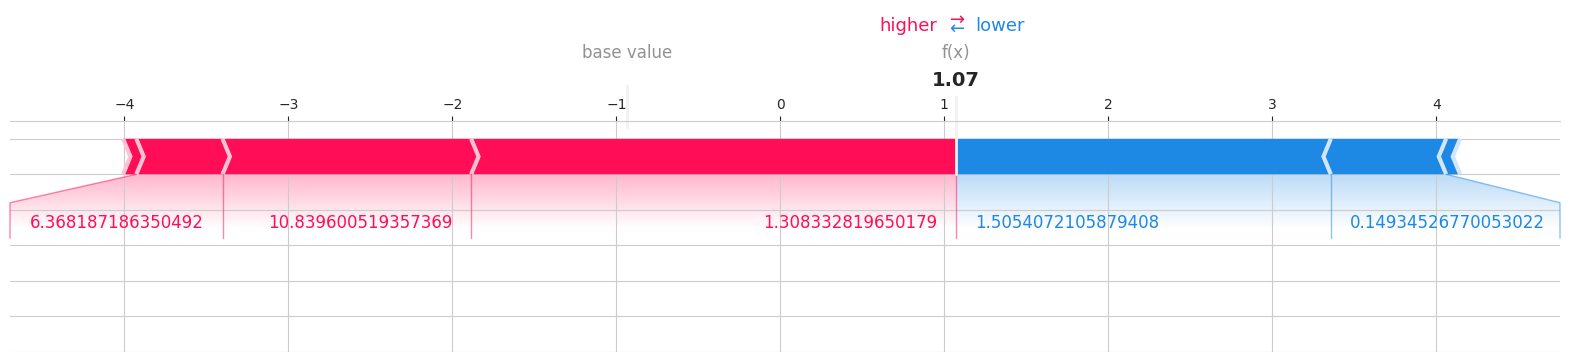

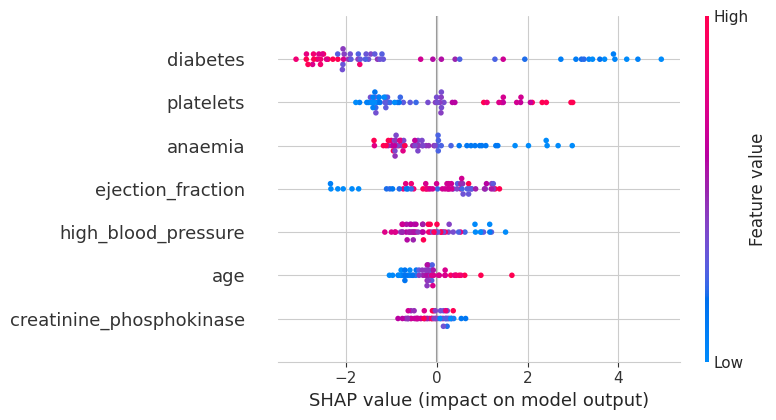

In [61]:
# Initialize SHAP explainer using the classifier in the pipeline
shap_explainer = shap.TreeExplainer(xgb_best_estimator.named_steps['classifier'])

# Transform train and test data using the pipeline's preprocessor
X_train_transformed = xgb_best_estimator.named_steps['preprocessor'].transform(X_train)
X_test_transformed = xgb_best_estimator.named_steps['preprocessor'].transform(X_test)

# Compute SHAP values for the test set
# For binary classification models, SHAP sometimes provides a single set of values (not two classes)
shap_values = shap_explainer.shap_values(X_test_transformed)

# Visualize SHAP explanation with force_plot for a single prediction
instance_to_explain = X_test_transformed[0]
shap.force_plot(shap_explainer.expected_value, shap_values[0], instance_to_explain, matplotlib=True)

# Visualize global feature importance with summary_plot for the entire test set
shap.summary_plot(shap_values, X_test_transformed, feature_names=X_test.columns)

### SHAP Model Interpretation Summary

#### SHAP Force Plot
- **Base Value**: The model's average prediction for all instances in the dataset.
- **Prediction (f(x))**: The specific prediction value for the explained instance.
- **Feature Contributions**:
  - **Positive (Red)**: Features pushing the prediction towards "Fail" (e.g., high values for `creatinine_phosphokinase` and `platelets`).
  - **Negative (Blue)**: Features pushing the prediction towards "Not Fail".

#### SHAP Summary Plot
- **SHAP Value**: Represents each feature's impact on the model's predictions across all test instances.
  - **Positive**: Contributes towards "Fail" predictions.
  - **Negative**: Contributes towards "Not Fail" predictions.
- **Color Coding**:
  - **Red**: Higher feature values.
  - **Blue**: Lower feature values.

The SHAP plots provide both individual prediction insights (Force Plot) and an overall feature importance overview (Summary Plot), helping to understand the model's decision-making process.

## **Predictions**

In [62]:
# Select instances for prediction (positive and negative examples)
positive_idx = y_test[y_test == 1].index[1]
negative_idx = y_test[y_test == 0].index[1]

positive_instance = X_test.loc[[positive_idx]]
negative_instance = X_test.loc[[negative_idx]]

# Best estimators from the grid search
best_models = {
    'Logistic Regression': lr_grid_search.best_estimator_,
    'Decision Tree': dt_grid_search.best_estimator_,
    'Random Forest': rf_grid_search.best_estimator_,
    'XGBoost': xgb_grid_search.best_estimator_
}

# Dictionary to store model predictions
model_predictions = {}

# Get predictions for the positive and negative instances
for model_name, model in best_models.items():
    model_predictions[model_name] = {
        'Positive': model.predict_proba(positive_instance)[0, 1],  # Probability of "Fail" (Death)
        'Negative': model.predict_proba(negative_instance)[0, 1]   # Probability of "Survival" (Not Fail)
    }

# Output predicted probabilities for comparison
print("Model Predictions (Probability of Death for Positive, Survival for Negative):")
for model_name, prediction in model_predictions.items():
    print(f"\n{model_name}:")
    print(f"  Positive Instance Probability of Death: {prediction['Positive']:.4f}")
    print(f"  Negative Instance Probability of Survival: {1 - prediction['Negative']:.4f}")

# Check and output accuracy for each model on the selected instances
true_labels = {
    'Positive': 1,
    'Negative': 0
}

print("\nModel Prediction Accuracy for Selected Instances:")
for model_name, model in best_models.items():
    positive_pred_label = model.predict(positive_instance)[0]
    negative_pred_label = model.predict(negative_instance)[0]

    positive_accuracy = 'Correct' if positive_pred_label == true_labels['Positive'] else 'Incorrect'
    negative_accuracy = 'Correct' if negative_pred_label == true_labels['Negative'] else 'Incorrect'

    print(f"\n{model_name} Prediction Accuracy:")
    print(f"  Positive Instance - Predicted Label: {positive_pred_label}, Accuracy: {positive_accuracy}")
    print(f"  Negative Instance - Predicted Label: {negative_pred_label}, Accuracy: {negative_accuracy}")

Model Predictions (Probability of Death for Positive, Survival for Negative):

Logistic Regression:
  Positive Instance Probability of Death: 0.9917
  Negative Instance Probability of Survival: 0.9919

Decision Tree:
  Positive Instance Probability of Death: 1.0000
  Negative Instance Probability of Survival: 1.0000

Random Forest:
  Positive Instance Probability of Death: 0.8627
  Negative Instance Probability of Survival: 0.9920

XGBoost:
  Positive Instance Probability of Death: 0.9734
  Negative Instance Probability of Survival: 0.9961

Model Prediction Accuracy for Selected Instances:

Logistic Regression Prediction Accuracy:
  Positive Instance - Predicted Label: 1, Accuracy: Correct
  Negative Instance - Predicted Label: 0, Accuracy: Correct

Decision Tree Prediction Accuracy:
  Positive Instance - Predicted Label: 1, Accuracy: Correct
  Negative Instance - Predicted Label: 0, Accuracy: Correct

Random Forest Prediction Accuracy:
  Positive Instance - Predicted Label: 1, Accurac

### Model Predictions (Probability of Death for Positive, Survival for Negative)

The table below shows the probability predictions of "Death" for a positive instance and "Survival" for a negative instance, as computed by each model:

| Model                 | Positive Instance (Death) | Negative Instance (Survival) |
|-----------------------|---------------------------|------------------------------|
| **Logistic Regression** | 0.9917                     | 0.9919                       |
| **Decision Tree**       | 1.0000                     | 1.0000                       |
| **Random Forest**       | 0.8627                     | 0.9920                       |
| **XGBoost**             | 0.9734                     | 0.9961                       |

### Model Prediction Accuracy for Selected Instances

Each model’s prediction accuracy for the selected positive (Death) and negative (Survival) instances is shown below. All models correctly classified both instances.

- **Logistic Regression**
  - Positive Instance - Predicted Label: 1 (Correct)
  - Negative Instance - Predicted Label: 0 (Correct)

- **Decision Tree**
  - Positive Instance - Predicted Label: 1 (Correct)
  - Negative Instance - Predicted Label: 0 (Correct)

- **Random Forest**
  - Positive Instance - Predicted Label: 1 (Correct)
  - Negative Instance - Predicted Label: 0 (Correct)

- **XGBoost**
  - Positive Instance - Predicted Label: 1 (Correct)
  - Negative Instance - Predicted Label: 0 (Correct)

### Summary

All models provided accurate predictions for both positive and negative instances, with each model yielding high probabilities for the correct outcomes. This indicates robustness across models for these examples, though Logistic Regression, Decision Tree, and XGBoost showed near-perfect probabilities, especially on the negative instance (Survival).